<a href="https://colab.research.google.com/github/rrizkiramadhan08/RizkiRamadhanMLTask/blob/main/UAS/TASK%205/Basic_Linear_Algebra_of_3D_%26_NeRFs_Hero_Kartiko_1103210205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_cube(ax, cube, label, color="black") #membuat parameter ax (menggambar kubus), cube(koordinat membentuk kubus), label(penamaan)
    ax.scatter3D(cube[0, :], cube[1, :], cube[2, :], label=label, color=color) #Memplot 8 titik kubus ke dalam ruang 3D
    lines = [ #titik-titik untuk menghubungkan kubus
        [0, 1],
        [1, 2],
        [2, 3],
        [3, 0],
        [4, 5],
        [5, 6],
        [6, 7],
        [7, 4],
        [0, 4],
        [1, 5],
        [2, 6],
        [3, 7],
    ]
    for line in lines:
        ax.plot3D(cube[0, line], cube[1, line], cube[2, line], color=color)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    ax.set_xlim([-2, 2]) #membatasi rentang untuk sumbu x,y,z
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])

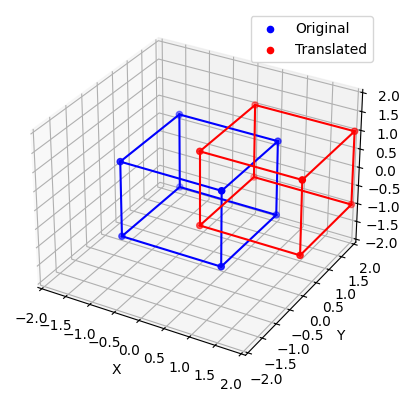

In [ ]:
# define 8 corners of our cube with coordinates (x,y,z,w) and w is always 1 in our case
cube = np.array(
    [
        [-1, -1, -1, 1],
        [1, -1, -1, 1],
        [1, 1, -1, 1],
        [-1, 1, -1, 1],
        [-1, -1, 1, 1],
        [1, -1, 1, 1],
        [1, 1, 1, 1],
        [-1, 1, 1, 1],
    ]
)

# translate to follow OpenGL notation
cube = cube.T

# set up figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# plot original cube
plot_cube(ax, cube, label="Original", color="blue")

# Menggeser cube sebanyak 1 langkah pada sumbu x dan y
translation_matrix = np.array([[1, 0, 0, 1], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]])

# translation
translated_cube = translation_matrix @ cube
plot_cube(ax, translated_cube, label="Translated", color="red")

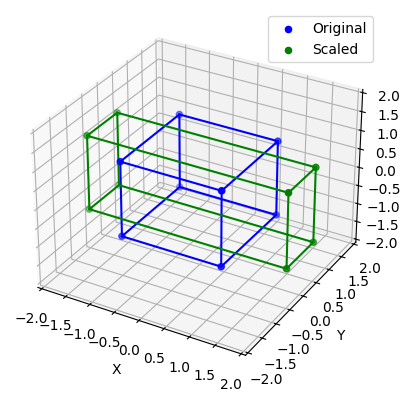

In [ ]:
# set up figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# plot original cube
plot_cube(ax, cube, label="Original", color="blue")

# scaling matrix (scale by 2 along x-axis and by 0.5 along y-axis)
scaling_matrix = np.array([[2, 0, 0, 0], [0, 0.5, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])


scaled_cube = scaling_matrix @ cube

plot_cube(ax, scaled_cube, label="Scaled", color="green")

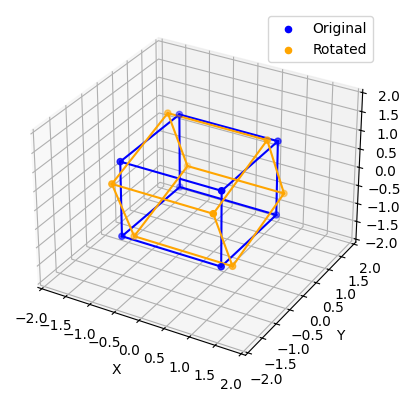

In [ ]:
# set up figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# plot original cube
plot_cube(ax, cube, label="Original", color="blue")

# rotation matrix: +20 degree around x-axis
angle = 20 * np.pi / 180
rotation_matrix = np.array(
    [
        [1, 0, 0, 0],
        [0, np.cos(angle), -np.sin(angle), 0],
        [0, np.sin(angle), np.cos(angle), 0],
        [0, 0, 0, 1],
    ]
)


rotated_cube = rotation_matrix @ cube

plot_cube(ax, rotated_cube, label="Rotated", color="orange")

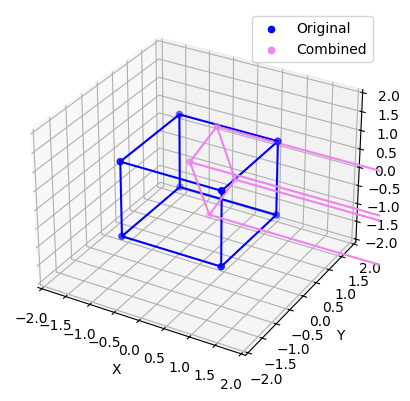

In [ ]:
# set up figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# plot original cube
plot_cube(ax, cube, label="Original", color="blue")

# combination of transforms
combination_transform = rotation_matrix.dot(scaling_matrix.dot(translation_matrix))
final_result = combination_transform.dot(cube)
plot_cube(ax, final_result, label="Combined", color="violet")

Input Values:


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


,

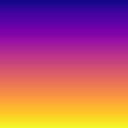
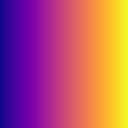

Encoded Values:


,,,,,,,

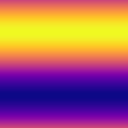
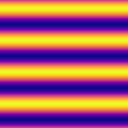
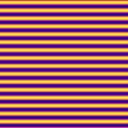
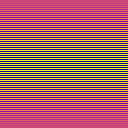
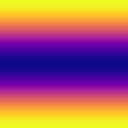
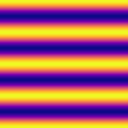
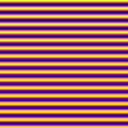
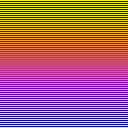

In [ ]:
import torch
import mediapy as media
import numpy as np


def positional_encoding(in_tensor, num_frequencies, min_freq_exp, max_freq_exp):
    """Function for positional encoding."""
    # Scale input tensor to [0, 2 * pi]
    scaled_in_tensor = 2 * np.pi * in_tensor
    # Generate frequency spectrum
    freqs = 2 ** torch.linspace(
        min_freq_exp, max_freq_exp, num_frequencies, device=in_tensor.device
    )
    # Generate encodings
    scaled_inputs = scaled_in_tensor.unsqueeze(-1) * freqs
    encoded_inputs = torch.cat(
        [torch.sin(scaled_inputs), torch.cos(scaled_inputs)], dim=-1
    )
    return encoded_inputs.view(*in_tensor.shape[:-1], -1)


def visualize_grid(grid, encoded_images, resolution):
    """Helper Function to visualize grid."""
    # Split the grid into separate channels for x and y
    x_channel, y_channel = grid[..., 0], grid[..., 1]
    # Show the original grid
    print("Input Values:")
    media.show_images([x_channel, y_channel], cmap="plasma", border=True)
    # Show the encoded grid
    print("Encoded Values:")
    num_channels_to_visualize = min(
        8, encoded_images.shape[-1]
    )  # Visualize up to 8 channels
    encoded_images_to_show = encoded_images.view(resolution, resolution, -1).permute(
        2, 0, 1
    )[:num_channels_to_visualize]
    media.show_images(encoded_images_to_show, vmin=-1, vmax=1, cmap="plasma", border=True)


# Parameters similar to your NeRFEncoding example
num_frequencies = 4
min_freq_exp = 0
max_freq_exp = 6
resolution = 128

# Generate a 2D grid of points in the range [0, 1]
x_samples = torch.linspace(0, 1, resolution)
y_samples = torch.linspace(0, 1, resolution)
grid = torch.stack(
    torch.meshgrid(x_samples, y_samples), dim=-1
)  # [resolution, resolution, 2]

# Apply positional encoding
encoded_grid = positional_encoding(grid, num_frequencies, min_freq_exp, max_freq_exp)

# Visualize result
visualize_grid(grid, encoded_grid, resolution)